In [1]:
import pandas as pd
import seaborn 
import matplotlib.pyplot as plt 
import re

In [2]:
sessions_df = pd.read_csv("/mnt/datalake/openmind/MedP-Midas/notebooks/eda/data/sessions.tsv",sep='\t')
sessions_df["Patient's Age (00101010)"] = sessions_df["Patient's Age (00101010)"].apply(lambda i:None if i == 0 else i)
sessions_df


,filename,patient label,Manufacturer (00080070),Series Description (0008103E),Manufacturer's Model Name (00081090),Patient's Sex (00100040),Patient's Age (00101010),Patient's Weight (00101030),Scanning Sequence (00180020),Sequence Variant (00180021),...,Slice Location (00201041),Rows (00280010),Columns (00280011),Pixel Spacing (00280030),Bits Allocated (00280100),Number of Averages (00180083),Echo Number(s) (00180086),Field of View Dimension(s) in Float (00189461),subject,session
0,sub-S0018518_ses-E0019865_run-1_bp-lsspine_vp-...,260824140281153420865588499607617203044,GE MEDICAL SYSTEMS,SAGT2LUMBAR,SIGNA EXCITE,M,56.0,100.0,SE,OSP,...,-26.341686,512,512,0.624994,16,2.00000,1,NaN,sub-S0018518,ses-E0019865
1,sub-S0018518_ses-E0019865_run-1_bp-lsspine_vp-...,260824140281153420865588499607617203044,GE MEDICAL SYSTEMS,SAGITALSTIR,SIGNA EXCITE,M,56.0,100.0,RM,NONE,...,-4.350216,512,512,0.624994,16,3.00000,1,NaN,sub-S0018518,ses-E0019865
2,sub-S0018518_ses-E0019865_acq5_run-1_bp-spine_...,260824140281153420865588499607617203044,GE MEDICAL SYSTEMS,AXIALT2DISCBASICO,SIGNA EXCITE,M,56.0,100.0,SE,NONE,...,110.076851,512,512,0.390620,16,3.00000,1,NaN,sub-S0018518,ses-E0019865
3,sub-S0018518_ses-E0019865_run-1_bp-lsspine_vp-...,260824140281153420865588499607617203044,GE MEDICAL SYSTEMS,SAGT1LUMBAR,SIGNA EXCITE,M,56.0,100.0,RM,OSP,...,6.645519,512,512,0.624994,16,1.00000,1,NaN,sub-S0018518,ses-E0019865
4,sub-S0018321_ses-E0019668_acq5_run-1_bp-spine_...,185607511902533854371993938236241730673,GE MEDICAL SYSTEMS,AXIALT2DISCBASICO,SIGNA EXCITE,M,69.0,97.0,SE,OSP,...,-42.388729,512,512,0.390625,16,2.00000,1,NaN,sub-S0018321,ses-E0019668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79250,sub-S0098321_ses-E00112566_run-1_bp-spine_vp-c...,237148700905341844233065790734731396908,GE MEDICAL SYSTEMS,COR SSFSE lumbar,Signa HDxt,F,19.0,56.0,SE,SK,...,-19.358856,512,512,0.781300,16,0.53125,1,NaN,sub-S0098321,ses-E00112566
79251,sub-S0098321_ses-E00112566_run-2_bp-spine_vp-a...,237148700905341844233065790734731396908,GE MEDICAL SYSTEMS,AX T2 lumbar,Signa HDxt,F,19.0,56.0,SE,SK,...,92.069077,512,512,0.312500,16,1.50000,1,NaN,sub-S0098321,ses-E00112566
79252,sub-S0098321_ses-E00112566_acq2_run-1_bp-lsspi...,237148700905341844233065790734731396908,GE MEDICAL SYSTEMS,SAG T2 lumbar,Signa HDxt,F,19.0,56.0,SE,SK,...,-25.966482,512,512,0.585900,16,2.00000,1,NaN,sub-S0098321,ses-E00112566
79253,sub-S0098321_ses-E00112566_acq5_run-1_bp-spine...,237148700905341844233065790734731396908,GE MEDICAL SYSTEMS,Ax T2,Signa HDxt,F,19.0,56.0,SE,SK,...,-41.553371,512,512,0.390600,16,1.50000,1,NaN,sub-S0098321,ses-E00112566


In [3]:
dep_subjects_dict = {}
with open("/mnt/datalake/openmind/MedP-Midas/notebooks/eda/data/subject_dept.tsv") as dep_file:
    for l in dep_file:
        line = l.split('\t')
        dep_subjects_dict[line[1].strip()] = line[0].strip()
dep_subjects_dict

{'sub-S0017774': 'MIDASds01',
 'sub-S0017775': 'MIDASds01',
 'sub-S0017776': 'MIDASds01',
 'sub-S0017777': 'MIDASds01',
 'sub-S0017778': 'MIDASds01',
 'sub-S0017779': 'MIDASds01',
 'sub-S0017780': 'MIDASds01',
 'sub-S0017781': 'MIDASds01',
 'sub-S0017782': 'MIDASds01',
 'sub-S0017783': 'MIDASds01',
 'sub-S0017784': 'MIDASds01',
 'sub-S0017785': 'MIDASds01',
 'sub-S0017786': 'MIDASds01',
 'sub-S0017787': 'MIDASds01',
 'sub-S0017788': 'MIDASds01',
 'sub-S0017789': 'MIDASds01',
 'sub-S0017791': 'MIDASds01',
 'sub-S0017792': 'MIDASds01',
 'sub-S0017793': 'MIDASds01',
 'sub-S0017794': 'MIDASds01',
 'sub-S0017795': 'MIDASds01',
 'sub-S0017796': 'MIDASds01',
 'sub-S0017797': 'MIDASds01',
 'sub-S0017798': 'MIDASds01',
 'sub-S0017799': 'MIDASds01',
 'sub-S0017800': 'MIDASds01',
 'sub-S0017801': 'MIDASds01',
 'sub-S0017802': 'MIDASds01',
 'sub-S0017803': 'MIDASds01',
 'sub-S0017804': 'MIDASds01',
 'sub-S0017805': 'MIDASds01',
 'sub-S0017806': 'MIDASds01',
 'sub-S0017807': 'MIDASds01',
 'sub-S001

In [4]:
pattern = re.compile(r'(?P<sub>sub-S\d+)_(?P<ses>ses-E\d+)_(acq\d+_)?(run-\d+_)?(bp-(?P<bp>\w+)_)?(vp-(?P<vp>\w+)_)?(?P<mod>.*)\.nii\.gz')
def split_filename(series):
    
    filename = series['filename']
    match = pattern.search(filename)
    
    if(match):
        match_dict = match.groupdict()
        series['subject'] = match_dict['sub']
        series['session'] = match_dict['ses']
        series['bodypart'] = match_dict['bp']
        series['viewposition'] = match_dict['vp']
        series['modality'] = match_dict['mod']
    
    return series

sessions_df = sessions_df.apply(split_filename, axis=1)
sessions_df

,filename,patient label,Manufacturer (00080070),Series Description (0008103E),Manufacturer's Model Name (00081090),Patient's Sex (00100040),Patient's Age (00101010),Patient's Weight (00101030),Scanning Sequence (00180020),Sequence Variant (00180021),...,Pixel Spacing (00280030),Bits Allocated (00280100),Number of Averages (00180083),Echo Number(s) (00180086),Field of View Dimension(s) in Float (00189461),subject,session,bodypart,viewposition,modality
0,sub-S0018518_ses-E0019865_run-1_bp-lsspine_vp-...,260824140281153420865588499607617203044,GE MEDICAL SYSTEMS,SAGT2LUMBAR,SIGNA EXCITE,M,56.0,100.0,SE,OSP,...,0.624994,16,2.00000,1,NaN,sub-S0018518,ses-E0019865,lsspine,sag,T2w
1,sub-S0018518_ses-E0019865_run-1_bp-lsspine_vp-...,260824140281153420865588499607617203044,GE MEDICAL SYSTEMS,SAGITALSTIR,SIGNA EXCITE,M,56.0,100.0,RM,NONE,...,0.624994,16,3.00000,1,NaN,sub-S0018518,ses-E0019865,lsspine,sag,STIR
2,sub-S0018518_ses-E0019865_acq5_run-1_bp-spine_...,260824140281153420865588499607617203044,GE MEDICAL SYSTEMS,AXIALT2DISCBASICO,SIGNA EXCITE,M,56.0,100.0,SE,NONE,...,0.390620,16,3.00000,1,NaN,sub-S0018518,ses-E0019865,spine,ax,T2w
3,sub-S0018518_ses-E0019865_run-1_bp-lsspine_vp-...,260824140281153420865588499607617203044,GE MEDICAL SYSTEMS,SAGT1LUMBAR,SIGNA EXCITE,M,56.0,100.0,RM,OSP,...,0.624994,16,1.00000,1,NaN,sub-S0018518,ses-E0019865,lsspine,sag,T1w
4,sub-S0018321_ses-E0019668_acq5_run-1_bp-spine_...,185607511902533854371993938236241730673,GE MEDICAL SYSTEMS,AXIALT2DISCBASICO,SIGNA EXCITE,M,69.0,97.0,SE,OSP,...,0.390625,16,2.00000,1,NaN,sub-S0018321,ses-E0019668,spine,ax,T2w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79250,sub-S0098321_ses-E00112566_run-1_bp-spine_vp-c...,237148700905341844233065790734731396908,GE MEDICAL SYSTEMS,COR SSFSE lumbar,Signa HDxt,F,19.0,56.0,SE,SK,...,0.781300,16,0.53125,1,NaN,sub-S0098321,ses-E00112566,spine,cor,T2w
79251,sub-S0098321_ses-E00112566_run-2_bp-spine_vp-a...,237148700905341844233065790734731396908,GE MEDICAL SYSTEMS,AX T2 lumbar,Signa HDxt,F,19.0,56.0,SE,SK,...,0.312500,16,1.50000,1,NaN,sub-S0098321,ses-E00112566,spine,ax,T2w
79252,sub-S0098321_ses-E00112566_acq2_run-1_bp-lsspi...,237148700905341844233065790734731396908,GE MEDICAL SYSTEMS,SAG T2 lumbar,Signa HDxt,F,19.0,56.0,SE,SK,...,0.585900,16,2.00000,1,NaN,sub-S0098321,ses-E00112566,lsspine,sag,T2w
79253,sub-S0098321_ses-E00112566_acq5_run-1_bp-spine...,237148700905341844233065790734731396908,GE MEDICAL SYSTEMS,Ax T2,Signa HDxt,F,19.0,56.0,SE,SK,...,0.390600,16,1.50000,1,NaN,sub-S0098321,ses-E00112566,spine,ax,T2w


In [5]:
sessions_df["filename"][0]


'sub-S0018518_ses-E0019865_run-1_bp-lsspine_vp-sag_T2w.nii.gz'

In [6]:
sessions_df['department'] = sessions_df['subject'].map(dep_subjects_dict)

In [7]:
sessions_df.describe()

,Patient's Age (00101010),Patient's Weight (00101030),Slice Thickness (00180050),Repetition Time (00180080),Echo Time (00180081),Inversion Time (00180082),Imaging Frequency (00180084),Magnetic Field Strength (00180087),Spacing Between Slices (00180088),Echo Train Length (00180091),...,Image Orientation (Patient) (00200037),Position Reference Indicator (00201040),Slice Location (00201041),Rows (00280010),Columns (00280011),Pixel Spacing (00280030),Bits Allocated (00280100),Number of Averages (00180083),Echo Number(s) (00180086),Field of View Dimension(s) in Float (00189461)
count,65883.000000,79255.000000,79253.000000,79255.000000,79255.000000,44955.000000,79254.000000,79255.000000,79172.000000,79255.000000,...,79255.000000,6.0,77773.000000,79255.000000,79255.000000,79255.000000,79255.0,79113.000000,79255.000000,0.0
mean,53.720444,74.961158,4.261561,2329.970857,69.560808,56.153922,66.025360,1.550952,4.963295,14.463781,...,0.419374,5341.0,15.090123,476.570652,475.097672,0.636150,16.0,2.545986,0.980228,NaN
std,15.996826,15.960682,6.136654,1701.020734,94.352442,115.956193,19.087720,0.448222,5.476273,19.857849,...,0.494147,0.0,82.716949,127.815117,121.788007,0.293360,0.0,1.384677,0.155079,NaN
min,2.000000,2.000000,0.000000,1.432000,0.500000,0.000000,8.527783,0.200000,0.400000,0.000000,...,-0.983219,5341.0,-3176.274797,64.000000,64.000000,0.106729,16.0,0.346154,0.000000,NaN
25%,43.000000,65.000000,3.500000,541.962000,11.832000,0.000000,63.848620,1.500000,4.000000,4.000000,...,-0.000000,5341.0,-12.569803,400.000000,400.000000,0.488281,16.0,1.500000,1.000000,NaN
50%,54.000000,75.000000,4.000000,2574.437500,60.000000,0.000000,63.865952,1.500000,4.500000,14.000000,...,0.000666,5341.0,9.900000,512.000000,512.000000,0.585900,16.0,2.000000,1.000000,NaN
75%,65.000000,85.000000,4.000000,3514.668457,109.200000,135.000000,63.893762,1.500000,5.000000,21.000000,...,0.999306,5341.0,35.528275,512.000000,512.000000,0.703118,16.0,4.000000,1.000000,NaN
max,116.000000,173.000000,745.000000,18750.000000,1550.340000,3400.000000,127.815036,3.000000,500.000000,439.000000,...,1.000000,5341.0,3933.901198,1797.000000,1056.000000,7.812500,16.0,12.000000,5.000000,NaN


In [8]:
nulls = sessions_df.isnull()
missing_count = nulls.sum()
value_count = nulls.count()
missing_percentage = round(missing_count/value_count * 100, 2)

missing_df = pd.DataFrame({'missing count':missing_count, 'percentage': missing_percentage})
missing_df

,missing count,percentage
filename,0,0.00
patient label,0,0.00
Manufacturer (00080070),0,0.00
Series Description (0008103E),0,0.00
Manufacturer's Model Name (00081090),0,0.00
Patient's Sex (00100040),0,0.00
Patient's Age (00101010),13372,16.87
Patient's Weight (00101030),0,0.00
Scanning Sequence (00180020),0,0.00
Sequence Variant (00180021),0,0.00


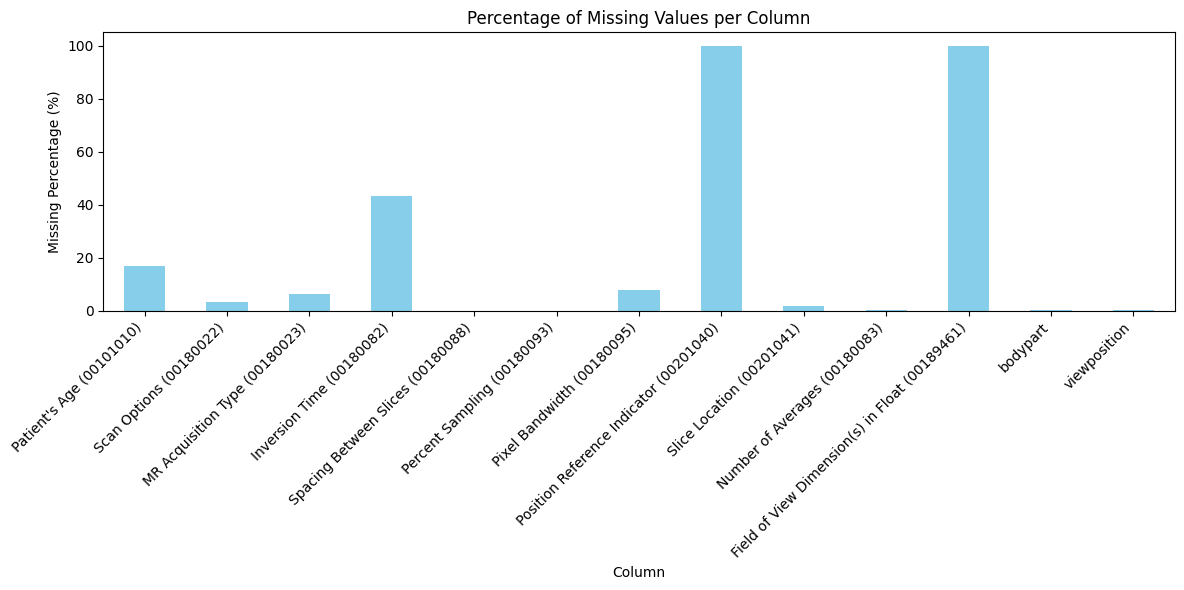

In [9]:
ax = missing_df[missing_df['percentage'] > 0].plot.bar(
    y='percentage', 
    figsize=(12, 6), 
    legend=False, 
    color='skyblue'
)
ax.set_title('Percentage of Missing Values per Column')
ax.set_ylabel('Missing Percentage (%)')
ax.set_xlabel('Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# CLINICAL DATA


In [10]:

# Cambia la ruta al archivo según corresponda
ruta_alcohol = "/mnt/datalake/openmind/MedP-Midas/variables/sd2022/SD2022_ALCOHOL_2015_2018_con_SIP_codif.txt"
ruta_consultas = "/mnt/datalake/openmind/MedP-Midas/variables/sd2022/SD2022_CONSULTAS_con_SIP_codif.txt"
ruta_dispensacion = "/mnt/datalake/openmind/MedP-Midas/variables/sd2022/SD2022_DISPEN_RELE_con_SIP_codif.txt"
ruta_IT = "/mnt/datalake/openmind/MedP-Midas/variables/sd2022/SD2022_IT_con_SIP_codif.txt"
ruta_mediciones = "/mnt/datalake/openmind/MedP-Midas/variables/sd2022/SD2022_MEDICIONES_con_SIP_codif.txt"
ruta_TABQ = "/mnt/datalake/openmind/MedP-Midas/variables/sd2022/SD2022_TABQ_2015_2018_con_SIP_codif.txt"
ruta_urgencias = "/mnt/datalake/openmind/MedP-Midas/variables/sd2022/SD2022_URGENCIAS_con_SIP_codif.txt"

df_alcohol = pd.read_csv(ruta_alcohol, sep="|")
df_consultas = pd.read_csv(ruta_consultas, sep="|",encoding='latin1')
df_dispensacion = pd.read_csv(ruta_dispensacion, sep="|",encoding='latin1')
df_IT = pd.read_csv(ruta_IT, sep="|",encoding='latin1')
df_mediciones = pd.read_csv(ruta_mediciones, sep="|",encoding='latin1')
df_TABQ = pd.read_csv(ruta_TABQ, sep="|",encoding='latin1')
df_urgencias = pd.read_csv(ruta_urgencias, sep="|",encoding='latin1')

print("df_alcohol:", df_alcohol.shape)
print("df_consultas:", df_consultas.shape)
print("df_dispensacion:", df_dispensacion.shape)
print("df_IT:", df_IT.shape)
print("df_mediciones:", df_mediciones.shape)
print("df_TABQ:", df_TABQ.shape)
print("df_urgencias:", df_urgencias.shape)

for name, df in [
    ("df_alcohol", df_alcohol),
    ("df_consultas", df_consultas),
    ("df_dispensacion", df_dispensacion),
    ("df_IT", df_IT),
    ("df_mediciones", df_mediciones),
    ("df_TABQ", df_TABQ),
    ("df_urgencias", df_urgencias)
]:
    sip_col = [col for col in df.columns if col.lower() in ["sip_codif", "sip_codif"] or col.lower() == "sip_codif"]
    if sip_col:
        sip_col = sip_col[0]
        common = set(df[sip_col]).intersection(set(sessions_df["patient label"]))
        print(f"{name}: {len(common)} common SIP_codif with sessions_df['patient label']")
    else:
        print(f"{name}: SIP_codif column not found")


df_alcohol: (891, 7)
df_consultas: (2344772, 4)
df_dispensacion: (4979097, 10)
df_IT: (14325, 6)
df_mediciones: (101081, 4)
df_TABQ: (7684, 5)
df_urgencias: (86508, 6)
df_alcohol: 405 common SIP_codif with sessions_df['patient label']
df_consultas: 13778 common SIP_codif with sessions_df['patient label']
df_dispensacion: 13743 common SIP_codif with sessions_df['patient label']
df_IT: 3813 common SIP_codif with sessions_df['patient label']
df_mediciones: 5325 common SIP_codif with sessions_df['patient label']
df_TABQ: 2732 common SIP_codif with sessions_df['patient label']
df_urgencias: 10698 common SIP_codif with sessions_df['patient label']


In [40]:
sub_df = sessions_df[sessions_df['patient label']=='260824140281153420865588499607617203044']

In [41]:
sub_df

,filename,patient label,Manufacturer (00080070),Series Description (0008103E),Manufacturer's Model Name (00081090),Patient's Sex (00100040),Patient's Age (00101010),Patient's Weight (00101030),Scanning Sequence (00180020),Sequence Variant (00180021),...,Bits Allocated (00280100),Number of Averages (00180083),Echo Number(s) (00180086),Field of View Dimension(s) in Float (00189461),subject,session,bodypart,viewposition,modality,department
0,sub-S0018518_ses-E0019865_run-1_bp-lsspine_vp-...,260824140281153420865588499607617203044,GE MEDICAL SYSTEMS,SAGT2LUMBAR,SIGNA EXCITE,M,56.0,100.0,SE,OSP,...,16,2.0,1,NaN,sub-S0018518,ses-E0019865,lsspine,sag,T2w,MIDASds02
1,sub-S0018518_ses-E0019865_run-1_bp-lsspine_vp-...,260824140281153420865588499607617203044,GE MEDICAL SYSTEMS,SAGITALSTIR,SIGNA EXCITE,M,56.0,100.0,RM,NONE,...,16,3.0,1,NaN,sub-S0018518,ses-E0019865,lsspine,sag,STIR,MIDASds02
2,sub-S0018518_ses-E0019865_acq5_run-1_bp-spine_...,260824140281153420865588499607617203044,GE MEDICAL SYSTEMS,AXIALT2DISCBASICO,SIGNA EXCITE,M,56.0,100.0,SE,NONE,...,16,3.0,1,NaN,sub-S0018518,ses-E0019865,spine,ax,T2w,MIDASds02
3,sub-S0018518_ses-E0019865_run-1_bp-lsspine_vp-...,260824140281153420865588499607617203044,GE MEDICAL SYSTEMS,SAGT1LUMBAR,SIGNA EXCITE,M,56.0,100.0,RM,OSP,...,16,1.0,1,NaN,sub-S0018518,ses-E0019865,lsspine,sag,T1w,MIDASds02


In [38]:
df_urgencias[df_urgencias['SIP_codif'] == '260824140281153420865588499607617203044']

,SIP_codif,MOMENTO_REGISTRO,COD_1,DESCRIP_1,COD_2,DESCRIP_2
3641,260824140281153420865588499607617203044,02-JAN-16,738.4,ESPONDILOLISTESIS ADQUIRIDA,715.38,OSTEOARTROSIS LOCALIZADA SIN ESPECIFICAR OTRAS...


In [25]:
# Merge each clinical dataframe with sessions_df, adding only columns (not new rows), keeping the same number of rows as sessions_df

# Merge all clinical dataframes into sessions_df, adding columns (not rows), keeping the same number of rows as sessions_df

merged_df = sessions_df.copy()
for name, df in [
    ("alcohol", df_alcohol),
    ("consultas", df_consultas),
    ("dispensacion", df_dispensacion),
    ("IT", df_IT),
    ("mediciones", df_mediciones),
    ("TABQ", df_TABQ),
    ("urgencias", df_urgencias)
]:
    sip_col = [col for col in df.columns if col.lower() == "sip_codif"]
    if sip_col:
        sip_col = sip_col[0]
        # Avoid duplicate columns
        cols_to_add = [col for col in df.columns if col != sip_col and col not in merged_df.columns]
        merged_df = merged_df.merge(
            df[[sip_col] + cols_to_add],
            left_on="patient label",
            right_on=sip_col,
            how="left",
            suffixes=('', f'_{name}')
        )
    else:
        print(f"{name}: SIP_codif column not found")

# Example: merged_dfs["alcohol"].head()

# Example: merged_dfs["alcohol"].head()

: 

: 

: 